# ORB detektor használata OpenCV-ben

Ebben a leckében áttekintjük, hogyan használhatjuk az ORB detektort jellemzőpontok kereséséhez és leírásához. A Harris és a Shi-Tomasi sarokdetektorhoz képest itt az egyik legfontosabb különbség, hogy nem csupán a jellemzőpont helyét határozza meg a detektor, hanem a pontok egy *leírása* (tulajdonsága) is meghatározhatól. Ezen leírók alapján az egyes pontok megkülönböztethetők. 

## Az ORB detektor és leíró

A jellemződetektor alapját egy orientációt figyelembe vevő [FAST detektor](https://en.wikipedia.org/wiki/Features_from_accelerated_segment_test) képezi, amelynek lényege, hogy egy 16 pontból álló kört vizsgál minden pixel körül, és amennyiben ezen 16 pixelből $N$ pixel világosabb, mint a kör közepén lévő pixel + egy küszöbérték, vagy pedig sötétebb, mint a centrális pixel - egy küszöbérték, akkor a centrális pixel sarokpontnak tekinthető. 

A jellemzőpont leírását egy [BRIEF](https://www.cs.ubc.ca/~lowe/525/papers/calonder_eccv10.pdf) bináris leíró bitsorozattal adja meg. 

Az ORB detektor és leíró részletese bemutatása [Ethan Rublee és szerzőtársai közleményében](http://www.willowgarage.com/sites/default/files/orb_final.pdf) olvasható.

Az ORB detektor előnye a SIFT és SURF detektorokkal szemben az, hogy szabadon használható mint oktatási, kutatási mind pedig ipari, kereskedelmi célokra. 

## Az ORB detektor használata az OpenCV függvénykönyvtárral

Az OpenCV-ben megvalósított ORB detektor a FAST vagy Harris sarokdetektort [többszintű képpiramison](https://www.tankonyvtar.hu/hu/tartalom/tamop412A/2011-0063_15_gepi_latas/ch07.html) futtatja végig. Elsőrendű momentumok alapján meghatározza az orientációt és egy BRIEF leíró segítségével elkészíti a jellemzőpont leírását. 

Az ORB detektor az *ORB* osztály *create* (Python-ban *cv.ORB_create*) függvénye hozza létre. A detektor beállítható paraméterei az alábbiak:
* **nfeatures**: hány darab jellemzőpontot szeretnénk maximálisan kapni eredményül
* **scaleFactor**: ez a képpiramis skálafaktora
* **nlevels**: a képpiramis szintjeinek a száma
* **edgeThreshold**: egy küszöbérték, amely a sarkosságra vonatkozik (mennyire erős éleket vegyen figyelembe)
* **firstLevel**: a képpiramis első szintje ahol a detekció megkezdődik
* **WTA_k**: a pontok száma, amely alapján a BRIEF leíró elkészíti a leírást. 
* **scoreType**: be lehet állítani, hogy a Harris vagy a FAST sarokdetektort hasznájuk 
* **patchSize**: a sarokpont környezetének figyelembe vett mérete a BRIEF leírás készítésétésekor

# Példaprogram az ORB detektor használatához

Az alábbi példában áttekintjük az ORB detektor használatát. Megjegyzendő, hogy sok más jellemződetektor használata hasonlóképpen használható. 

A példa az alábbi lépésekből áll: 
1. Egy kép beolvasása.
2. A képet szürkeárnyalatossá konvertáljuk.
3. Létrehozzuk a jellemződetektort. 
4. Jellemzőpontokat (kulcspontokat) detektálunk a szürkeárnyalatos képen.
5. Kiszámoljuk a jellemzőpontokhoz (kulcspontokhoz) leírókat.
6. Kirajzoljuk a képre a detektált jellemzőpontokat. 


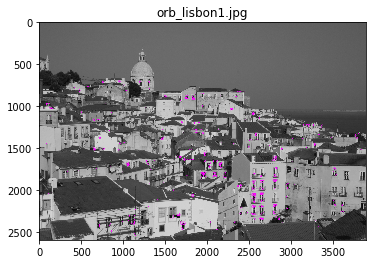

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


SOURCE_IMAGE='lisbon1.jpg'
OUTPUT_IMAGE='orb_lisbon1.jpg'

## kép beolvasása
img = cv2.imread(SOURCE_IMAGE);

## a képet szürkeárnyalatossá konvertáljuk
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## jellemzőpontok detektálása
nFeaturePoints = 1000
patchSize = 10
scroreType = cv2.ORB_FAST_SCORE
orb = cv2.ORB_create(nfeatures=nFeaturePoints, scoreType=scroreType, patchSize=patchSize)
keypoints = orb.detect(gray_img)

## kulcspont leírók számítása
keypoints, descriptors = orb.compute(gray_img, keypoints)

## kulcspontok kirajzolása
out_img = cv2.drawKeypoints(gray_img, keypoints, descriptors, color=(255, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imwrite(OUTPUT_IMAGE, out_img)
plt.imshow(out_img);
plt.title(OUTPUT_IMAGE)
plt.show()